# HOUSE PRICE PREDICTION

The following features are given in the dataset:
    1. Year of sale of the house
    2. The age of the house at the time of the sale
    3. Distance from the city center
    4. Number of stores in the locality
    5. The latitude
    6. The longitude

## Importing Libraries and Helper Functions

This also includes some utility functions written in utils.py which contains the functions: 1. plot_loss 2. plot_predictuions 3. compare_predictions

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
%matplotlib inline
tf.logging.set_verbosity(tf.logging.ERROR)

## Importing the Data

Using pandas to read the csv file data.csv

In [12]:
df = pd.read_csv('data.csv')
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


## Checking for missing data

In [13]:
df.isna().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

## Data normalization

In [14]:
df = df.iloc[:, 1:]
df_normalized = (df - df.mean())/df.std()
df_normalized.head()

,date,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


## Converting label value

Since we have normalized the value of label, we need to convert back the predicted values to the original form.

In [15]:
y_mean = df['price'].mean()
y_std = df['price'].std()
def convert_label_value(pred):
    return int(pred*y_std + y_mean)

## Selecting features and labels

Removing the price from the list of features as it is the label

In [17]:
X = df_normalized.iloc[:, :6]
X.head()

,date,age,distance,stores,latitude,longitude
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141


In [19]:
Y = df_normalized.iloc[:, -1]
Y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

## Extracting feature and label values

We need to extract the numeric values of feature and label as the TensorFlow model will expect numeric values as input

In [20]:
X_arr = X.values
Y_arr = Y.values
print("X_arr shape: ", X_arr.shape)
print("Y_arr shape: ", Y_arr.shape)

X_arr shape:  (5000, 6)
Y_arr shape:  (5000,)


## Data splitting

Keeping 5% of the data for testing and rest for training

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X_arr, Y_arr, test_size=0.05, shuffle=True, random_state=0)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_train shape: ", Y_train.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (4750, 6)
X_test shape:  (250, 6)
Y_train shape:  (4750,)
Y_test shape:  (250,)


## Creating the neural network model

Creating a three hidden layer NN

In [25]:
def my_model():
    model = Sequential([
        Dense(10, input_shape = (6,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])
    model.compile(
        loss = 'mse',
        optimizer = 'adadelta'
    )
    return model
model = my_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                70        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


## Model Training

Using EarlyStopping callback from keras to stop model training if validation loss stops decreasing for a few epochs

In [27]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5)
model = my_model()
preds_on_untrained = model.predict(X_test)
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 1000, callbacks = [early_stopping])

Train on 4750 samples, validate on 250 samples
Epoch 1/1000
4750/4750 [==============================] - 1s 137us/sample - loss: 0.9681 - val_loss: 0.7975
Epoch 2/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.9652 - val_loss: 0.7947
Epoch 3/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.9623 - val_loss: 0.7919
Epoch 4/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.9595 - val_loss: 0.7891
Epoch 5/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.9567 - val_loss: 0.7863
Epoch 6/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.9539 - val_loss: 0.7835
Epoch 7/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.9510 - val_loss: 0.7807
Epoch 8/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.9482 - val_loss: 0.7779
Epoch 9/1000
4750/4750 [==============================] - 0s 71us/sample - loss: 0.9454 - val_lo

4750/4750 [==============================] - 0s 71us/sample - loss: 0.8020 - val_loss: 0.6377
Epoch 77/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.8003 - val_loss: 0.6361
Epoch 78/1000
4750/4750 [==============================] - 0s 72us/sample - loss: 0.7986 - val_loss: 0.6345
Epoch 79/1000
4750/4750 [==============================] - 0s 68us/sample - loss: 0.7969 - val_loss: 0.6329
Epoch 80/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.7952 - val_loss: 0.6313
Epoch 81/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.7935 - val_loss: 0.6297
Epoch 82/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.7918 - val_loss: 0.6281
Epoch 83/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.7902 - val_loss: 0.6266
Epoch 84/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.7886 - val_loss: 0.6251
Epoch 85/1000
4750/4750 [=================

4750/4750 [==============================] - 0s 67us/sample - loss: 0.6950 - val_loss: 0.5385
Epoch 152/1000
4750/4750 [==============================] - 0s 74us/sample - loss: 0.6938 - val_loss: 0.5373
Epoch 153/1000
4750/4750 [==============================] - 0s 72us/sample - loss: 0.6925 - val_loss: 0.5362
Epoch 154/1000
4750/4750 [==============================] - 0s 71us/sample - loss: 0.6913 - val_loss: 0.5351
Epoch 155/1000
4750/4750 [==============================] - 0s 68us/sample - loss: 0.6901 - val_loss: 0.5339
Epoch 156/1000
4750/4750 [==============================] - 0s 68us/sample - loss: 0.6889 - val_loss: 0.5329
Epoch 157/1000
4750/4750 [==============================] - 0s 70us/sample - loss: 0.6877 - val_loss: 0.5318
Epoch 158/1000
4750/4750 [==============================] - 0s 68us/sample - loss: 0.6865 - val_loss: 0.5307
Epoch 159/1000
4750/4750 [==============================] - 0s 69us/sample - loss: 0.6854 - val_loss: 0.5297
Epoch 160/1000
4750/4750 [========

4750/4750 [==============================] - 0s 66us/sample - loss: 0.6114 - val_loss: 0.4630
Epoch 227/1000
4750/4750 [==============================] - 0s 64us/sample - loss: 0.6104 - val_loss: 0.4621
Epoch 228/1000
4750/4750 [==============================] - 0s 76us/sample - loss: 0.6093 - val_loss: 0.4612
Epoch 229/1000
4750/4750 [==============================] - 0s 75us/sample - loss: 0.6083 - val_loss: 0.4603
Epoch 230/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.6073 - val_loss: 0.4594
Epoch 231/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.6063 - val_loss: 0.4585
Epoch 232/1000
4750/4750 [==============================] - 0s 68us/sample - loss: 0.6053 - val_loss: 0.4576
Epoch 233/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.6042 - val_loss: 0.4567
Epoch 234/1000
4750/4750 [==============================] - 0s 68us/sample - loss: 0.6032 - val_loss: 0.4559
Epoch 235/1000
4750/4750 [========

4750/4750 [==============================] - 0s 65us/sample - loss: 0.5408 - val_loss: 0.4017
Epoch 302/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.5399 - val_loss: 0.4010
Epoch 303/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.5391 - val_loss: 0.4003
Epoch 304/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.5383 - val_loss: 0.3996
Epoch 305/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.5374 - val_loss: 0.3989
Epoch 306/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.5366 - val_loss: 0.3982
Epoch 307/1000
4750/4750 [==============================] - 0s 64us/sample - loss: 0.5357 - val_loss: 0.3975
Epoch 308/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.5349 - val_loss: 0.3969
Epoch 309/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.5341 - val_loss: 0.3962
Epoch 310/1000
4750/4750 [========

4750/4750 [==============================] - 0s 70us/sample - loss: 0.4831 - val_loss: 0.3545
Epoch 377/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.4824 - val_loss: 0.3540
Epoch 378/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.4817 - val_loss: 0.3534
Epoch 379/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.4810 - val_loss: 0.3528
Epoch 380/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.4803 - val_loss: 0.3523
Epoch 381/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.4797 - val_loss: 0.3517
Epoch 382/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.4790 - val_loss: 0.3512
Epoch 383/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.4783 - val_loss: 0.3506
Epoch 384/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.4776 - val_loss: 0.3501
Epoch 385/1000
4750/4750 [========

4750/4750 [==============================] - 0s 66us/sample - loss: 0.4366 - val_loss: 0.3182
Epoch 452/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.4361 - val_loss: 0.3178
Epoch 453/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.4355 - val_loss: 0.3174
Epoch 454/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.4350 - val_loss: 0.3170
Epoch 455/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.4344 - val_loss: 0.3165
Epoch 456/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.4339 - val_loss: 0.3161
Epoch 457/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.4333 - val_loss: 0.3157
Epoch 458/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.4327 - val_loss: 0.3153
Epoch 459/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.4322 - val_loss: 0.3149
Epoch 460/1000
4750/4750 [========

4750/4750 [==============================] - 0s 75us/sample - loss: 0.3989 - val_loss: 0.2902
Epoch 527/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.3985 - val_loss: 0.2899
Epoch 528/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.3981 - val_loss: 0.2896
Epoch 529/1000
4750/4750 [==============================] - 0s 68us/sample - loss: 0.3976 - val_loss: 0.2893
Epoch 530/1000
4750/4750 [==============================] - 0s 70us/sample - loss: 0.3972 - val_loss: 0.2889
Epoch 531/1000
4750/4750 [==============================] - 0s 71us/sample - loss: 0.3967 - val_loss: 0.2886
Epoch 532/1000
4750/4750 [==============================] - 0s 68us/sample - loss: 0.3963 - val_loss: 0.2883
Epoch 533/1000
4750/4750 [==============================] - 0s 69us/sample - loss: 0.3959 - val_loss: 0.2880
Epoch 534/1000
4750/4750 [==============================] - 0s 68us/sample - loss: 0.3954 - val_loss: 0.2876
Epoch 535/1000
4750/4750 [========

4750/4750 [==============================] - 0s 65us/sample - loss: 0.3686 - val_loss: 0.2681
Epoch 602/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.3682 - val_loss: 0.2678
Epoch 603/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.3679 - val_loss: 0.2675
Epoch 604/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.3675 - val_loss: 0.2673
Epoch 605/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.3671 - val_loss: 0.2670
Epoch 606/1000
4750/4750 [==============================] - 0s 64us/sample - loss: 0.3668 - val_loss: 0.2667
Epoch 607/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.3664 - val_loss: 0.2665
Epoch 608/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.3660 - val_loss: 0.2662
Epoch 609/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.3657 - val_loss: 0.2659
Epoch 610/1000
4750/4750 [========

4750/4750 [==============================] - 0s 65us/sample - loss: 0.3427 - val_loss: 0.2494
Epoch 677/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.3424 - val_loss: 0.2492
Epoch 678/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.3421 - val_loss: 0.2490
Epoch 679/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.3417 - val_loss: 0.2487
Epoch 680/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.3414 - val_loss: 0.2485
Epoch 681/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.3411 - val_loss: 0.2483
Epoch 682/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.3408 - val_loss: 0.2481
Epoch 683/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.3404 - val_loss: 0.2478
Epoch 684/1000
4750/4750 [==============================] - 0s 64us/sample - loss: 0.3401 - val_loss: 0.2476
Epoch 685/1000
4750/4750 [========

4750/4750 [==============================] - 0s 63us/sample - loss: 0.3202 - val_loss: 0.2342
Epoch 752/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.3199 - val_loss: 0.2340
Epoch 753/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.3196 - val_loss: 0.2338
Epoch 754/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.3193 - val_loss: 0.2337
Epoch 755/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.3190 - val_loss: 0.2335
Epoch 756/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.3188 - val_loss: 0.2333
Epoch 757/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.3185 - val_loss: 0.2331
Epoch 758/1000
4750/4750 [==============================] - 0s 64us/sample - loss: 0.3182 - val_loss: 0.2329
Epoch 759/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.3179 - val_loss: 0.2327
Epoch 760/1000
4750/4750 [========

4750/4750 [==============================] - 0s 63us/sample - loss: 0.3004 - val_loss: 0.2213
Epoch 827/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.3002 - val_loss: 0.2211
Epoch 828/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.2999 - val_loss: 0.2209
Epoch 829/1000
4750/4750 [==============================] - 0s 64us/sample - loss: 0.2997 - val_loss: 0.2208
Epoch 830/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.2994 - val_loss: 0.2206
Epoch 831/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.2992 - val_loss: 0.2205
Epoch 832/1000
4750/4750 [==============================] - 0s 63us/sample - loss: 0.2989 - val_loss: 0.2203
Epoch 833/1000
4750/4750 [==============================] - 0s 63us/sample - loss: 0.2987 - val_loss: 0.2201
Epoch 834/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.2985 - val_loss: 0.2200
Epoch 835/1000
4750/4750 [========

4750/4750 [==============================] - 0s 67us/sample - loss: 0.2832 - val_loss: 0.2100
Epoch 902/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.2829 - val_loss: 0.2099
Epoch 903/1000
4750/4750 [==============================] - 0s 68us/sample - loss: 0.2827 - val_loss: 0.2097
Epoch 904/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.2825 - val_loss: 0.2096
Epoch 905/1000
4750/4750 [==============================] - 0s 64us/sample - loss: 0.2823 - val_loss: 0.2094
Epoch 906/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.2821 - val_loss: 0.2093
Epoch 907/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.2819 - val_loss: 0.2091
Epoch 908/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.2817 - val_loss: 0.2090
Epoch 909/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.2815 - val_loss: 0.2088
Epoch 910/1000
4750/4750 [========

4750/4750 [==============================] - 0s 65us/sample - loss: 0.2680 - val_loss: 0.1995
Epoch 977/1000
4750/4750 [==============================] - 0s 64us/sample - loss: 0.2678 - val_loss: 0.1994
Epoch 978/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.2676 - val_loss: 0.1992
Epoch 979/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.2674 - val_loss: 0.1991
Epoch 980/1000
4750/4750 [==============================] - 0s 70us/sample - loss: 0.2672 - val_loss: 0.1990
Epoch 981/1000
4750/4750 [==============================] - 0s 66us/sample - loss: 0.2670 - val_loss: 0.1989
Epoch 982/1000
4750/4750 [==============================] - 0s 67us/sample - loss: 0.2668 - val_loss: 0.1987
Epoch 983/1000
4750/4750 [==============================] - 0s 68us/sample - loss: 0.2666 - val_loss: 0.1986
Epoch 984/1000
4750/4750 [==============================] - 0s 65us/sample - loss: 0.2664 - val_loss: 0.1985
Epoch 985/1000
4750/4750 [========

## Plotting training and validation loss

Using the plot_loss helper function

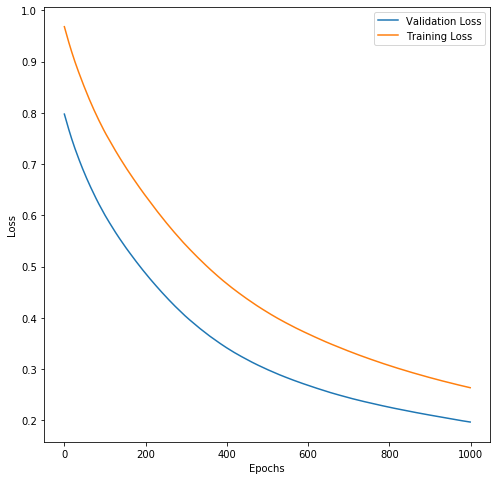

In [28]:
plot_loss(history)

# Predictions

## plotting raw predictions

Using compare_predictions helper function

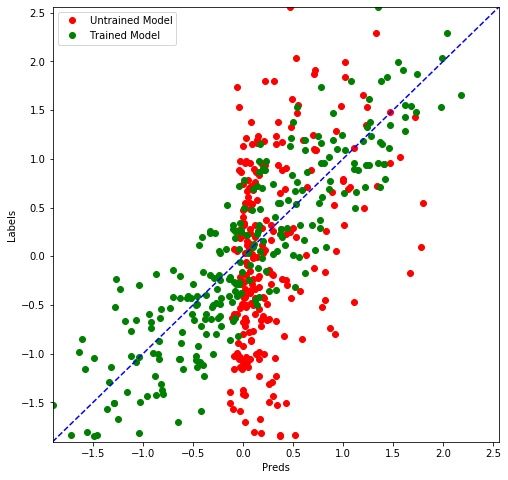

In [30]:
preds_on_trained = model.predict(X_test)
compare_predictions(preds_on_untrained, preds_on_trained, Y_test)

## plotting price predictions

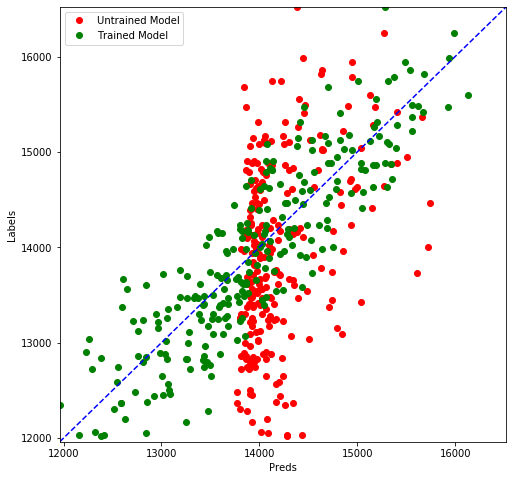

In [31]:
price_on_untrained = [convert_label_value(y) for y in preds_on_untrained]
price_on_trained = [convert_label_value(y) for y in preds_on_trained]
price_y_test = [convert_label_value(y) for y in Y_test]
compare_predictions(price_on_untrained, price_on_trained, price_y_test)